<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/gimseng/99-ML-Learning-Projects/blob/master/001/exercise/starter-notebook.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

## A starter notebook with tasks listed to help you get started on your first machine learning project

### First phase: Inspecting the data
(this process is where you familiarize yourself with the data)

Tasks:
- Inspect the data
- Check for null/missing values
- View statistical details using ``describe()``

Step one has been done for you 
After finishing the tasks think of the following:

What can you infer from the statistical measures? like possible outliers? 

**Important note:**

The data is already split into train.csv and test.csv, you generally would build your model using the train.csv **without** using any test.csv data as that would lead to overfitting your model

#### Reminder: you do not have to stick to the tasks listed word for word, the tasks are listed as a guide to guide you.
#### Feel free to explore more and do more on your own!

In [1741]:
# imports 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [1742]:
project_url = 'https://raw.githubusercontent.com/gimseng/99-ML-Learning-Projects/'
data_path = 'master/001/data/'
train = pd.read_csv(project_url+data_path+'train.csv')
test = pd.read_csv(project_url+data_path+'test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1743]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1744]:
# Check for null/missing values 
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1745]:
# Inspect the statistical measures
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Second phase: Data Analysis and Visualization (this process is where you explore the data, clean it and infer some insights from it)
Tasks:
- Plot the gender distribution of passengers on board
- Plot the rate of men and women who survived and who didnt survive
- Plot the survival rate by "Pclass" (male and female counted together in each Pclass)
- Plot the survival rate by males only in each "Pclass"
- Plot the survival rate by females only in each "Pclass"

Think about the plots that you just did, what can you infer from them?
Now lets have a look at the columns, there are always unnecessary columns that do not contribute to the prediction.

- Remove unnecessary columns from both train and test datasets
- Handle categorical text values and turn them into numerical
- Plot number of people who survived over age and passenger class

- Deal with null values in the Age column
- Group the data in the Age column into groups for better prediction.
- Get survival rates by age groups 
- Plot the correlation between features and label


What do you infer from the data? What can you conclude from it?who is most likely to survive, based on the data?


In [1746]:
del train['PassengerId']
del train['Ticket']
del train['Fare']
del train['Cabin']
del train['Name']
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [1747]:

del test['Ticket']
del test['Fare']
del test['Cabin']
del test['Name']
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,male,34.5,0,0,Q
1,893,3,female,47.0,1,0,S
2,894,2,male,62.0,0,0,Q
3,895,3,male,27.0,0,0,S
4,896,3,female,22.0,1,1,S
...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,S
414,1306,1,female,39.0,0,0,C
415,1307,3,male,38.5,0,0,S
416,1308,3,male,NaN,0,0,S


In [1748]:
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [1749]:
test.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Embarked        0
dtype: int64

In [1750]:
train['Sex'].unique()
out = {'male':0 , 'female':1}
train['Sex'] = train['Sex'].map(lambda x:out[x])

test['Sex'].unique()
out = {'male':0 , 'female':1}
test['Sex'] = test['Sex'].map(lambda x:out[x])

In [1751]:
train[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by='Survived',ascending=True)

,Survived
Pclass,
3,0.242363
2,0.472826
1,0.629630


In [1752]:
train[['Sex','Survived']].groupby(['Sex']).mean().sort_values(by='Survived',ascending=True)

,Survived
Sex,
0,0.188908
1,0.742038


In [1753]:
train[['SibSp','Survived']].groupby(['SibSp']).mean().sort_values(by='Survived',ascending=True)

,Survived
SibSp,
5,0.000000
8,0.000000
4,0.166667
3,0.250000
0,0.345395
2,0.464286
1,0.535885


In [1754]:
train[['Parch','Survived']].groupby(['Parch']).mean().sort_values(by='Survived',ascending=True)

,Survived
Parch,
4,0.000000
6,0.000000
5,0.200000
0,0.343658
2,0.500000
1,0.550847
3,0.600000


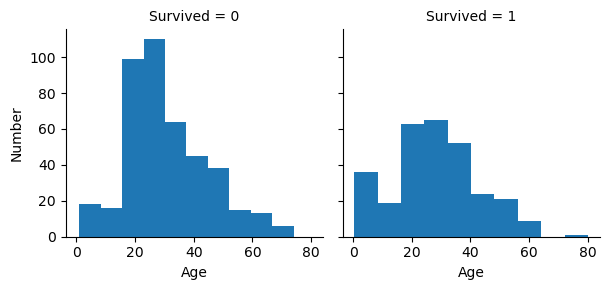

In [1755]:
age_hist = sns.FacetGrid(train, col='Survived')
age_hist.map(plt.hist, 'Age')
age_hist.set_ylabels('Number')

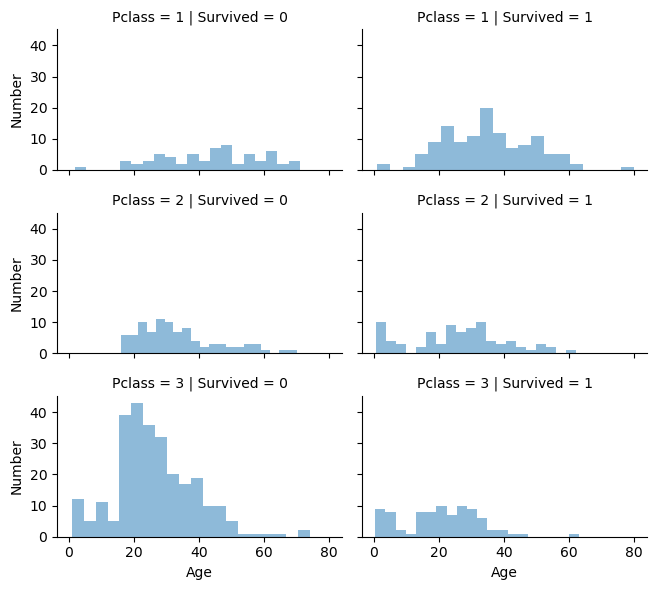

In [1756]:
pclass_age_grid = sns.FacetGrid(train, col='Survived', row='Pclass', height=2.0, aspect=1.6)
pclass_age_grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
pclass_age_grid.add_legend()
pclass_age_grid.set_ylabels('Number')

In [1757]:
#mean survived age
Survived_mean= train[train.Survived==1]['Age'].mean()
Survived_mean

28.343689655172415

In [1758]:
#mean unsurvived age
Unsurvived_mean= train[train.Survived==0]['Age'].mean()
Unsurvived_mean

30.62617924528302

In [1759]:
data = [train,test]

for dataset in data:
    mean = train["Age"].mean()
    std = train["Age"].std()
    is_null = dataset["Age"].isna().sum()

    random_age = np.random.randint(mean - std, mean + std, size = is_null)

    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = random_age
    dataset["Age"] = age_slice
    dataset["Age"] = train["Age"].astype(int)


train["Age"].isnull().sum()

0

In [1760]:
train.dropna(inplace=True)

In [1761]:
train['Embarked'].unique()
out = {'S':0 , 'C':1, 'Q':2}
train['Embarked'] = train['Embarked'].map(lambda x:out[x])

test['Embarked'].unique()
out = {'S':0 , 'C':1, 'Q':2}
test['Embarked'] = test['Embarked'].map(lambda x:out[x])


In [1762]:
train['Family_Members'] = train['Parch']+train['SibSp']+1
test['Family_Members'] = test['Parch']+test['SibSp']+1

del train['Parch']
del train['SibSp']

del test['Parch']
del test['SibSp']

In [1763]:
data=[train,test]

for dataset in data:
    dataset.loc[ dataset['Age'] <= 10, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 20), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 25), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 25) & (dataset['Age'] <= 30), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 37), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 37) & (dataset['Age'] <= 45), 'Age'] = 5
    dataset.loc[ dataset['Age'] > 45 , 'Age'] = 6

train['Age'].value_counts()

2    154
4    152
1    152
3    144
5    123
6    100
0     64
Name: Age, dtype: int64

In [1764]:
train

,Survived,Pclass,Sex,Age,Embarked,Family_Members
0,0,3,0,2,0,2
1,1,1,1,5,1,2
2,1,3,1,3,0,1
3,1,1,1,4,0,2
4,0,3,0,4,0,1
...,...,...,...,...,...,...
886,0,2,0,3,0,1
887,1,1,1,1,0,1
888,0,3,1,1,0,4
889,1,1,0,3,1,1


In [1765]:
test

,PassengerId,Pclass,Sex,Age,Embarked,Family_Members
0,892,3,0,2,2,1
1,893,3,1,5,0,2
2,894,2,0,3,2,1
3,895,3,0,4,0,1
4,896,3,1,4,0,3
...,...,...,...,...,...,...
413,1305,3,0,5,0,1
414,1306,1,1,5,1,1
415,1307,3,0,2,0,1
416,1308,3,0,4,0,1


In [1766]:
x = train.iloc[:,1:6]

In [1767]:
x

,Pclass,Sex,Age,Embarked,Family_Members
0,3,0,2,0,2
1,1,1,5,1,2
2,3,1,3,0,1
3,1,1,4,0,2
4,3,0,4,0,1
...,...,...,...,...,...
886,2,0,3,0,1
887,1,1,1,0,1
888,3,1,1,0,4
889,1,0,3,1,1


In [1768]:
y = train.iloc[:,0]

In [1769]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [1770]:
x_tr,x_te,y_tr,y_te = train_test_split(x,y,random_state=120,test_size=0.25)

### Third phase:
### Building the model and testing the accuracy (this process is where you start building models and choose a model based on accuracy metrics)
- Choose a model suitable for classification
- Fit the data
- Find out how "well" the model performs using some metrics
- Use cross validation to get the avg accuracy on the model you chose
- **Bonus 1** 
    - Try other classification algorithms 
    - Compare the accuracy metrics (including cross-validation) for the classification algorithms used by presenting them in a readable, easy to compare format
    - Choose a model with the best cross validation accuracy metric
- **Bonus 2**: Get the feature importance of your features using random forests
    (if you are not sure what that is or how to do it, google it!)

In [1771]:
from sklearn.neighbors import KNeighborsClassifier

In [1772]:
knn = KNeighborsClassifier(n_neighbors=10)

In [1773]:
knn.fit(x_tr,y_tr)

KNeighborsClassifier(n_neighbors=10)

In [1774]:
y_pred = knn.predict(x_te)

In [1775]:
y_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [1776]:
y_te

332    0
516    1
453    1
230    1
632    1
      ..
778    0
711    0
341    1
424    0
75     0
Name: Survived, Length: 223, dtype: int64

In [1777]:
from sklearn.metrics import accuracy_score, confusion_matrix , recall_score , f1_score , precision_score
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict

In [1778]:
print("Accuracy = ",accuracy_score(y_te,y_pred)*100)

Accuracy =  82.0627802690583


In [1779]:
print("Confusion Matrix", confusion_matrix(y_te,y_pred))

Confusion Matrix [[135  13]
 [ 27  48]]


In [1780]:
print("Recall Score = ", recall_score(y_te,y_pred)*100)

Recall Score =  64.0


In [1781]:
print("f1 Score = ", f1_score(y_te,y_pred)*100)

f1 Score =  70.58823529411764


In [1782]:
print("Precision score = ", precision_score(y_te,y_pred)*100)

Precision score =  78.68852459016394


In [1783]:
# cross-validation
kf = KFold(n_splits = 10)

scores= cross_val_score(knn, x_tr, y_tr, cv = kf, scoring='accuracy')

mean_acc_knn = scores.mean()*100

print('Scores: ', scores*100, '%')
print('Mean: ', mean_acc_knn, '%')
print('Standard Deviation: ', scores.std()*100, '%\n')


Scores:  [79.10447761 73.13432836 77.6119403  80.59701493 76.11940299 82.08955224
 83.33333333 74.24242424 84.84848485 74.24242424] %
Mean:  78.53233830845771 %
Standard Deviation:  3.908988237225923 %



In [1790]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=1)
log_reg.fit(x_te,y_te)
y_pred = log_reg.predict(x_te)
print("Accuracy = " , accuracy_score(y_te,y_pred)*100)

Accuracy =  81.16591928251121


In [1785]:
from sklearn.tree import DecisionTreeClassifier
dtclr = DecisionTreeClassifier(criterion='gini',splitter='random', random_state=1) 
dtclr.fit(x_tr,y_tr)
y_pred = dtclr.predict(x_te)
print("Acc. =" , accuracy_score(y_te,y_pred)*100)

Acc. = 79.82062780269058


In [1786]:
dtid3 = DecisionTreeClassifier(criterion='entropy' ,random_state=1)
dtid3.fit(x_tr,y_tr)
y_pred = dtid3.predict(x_te)
print("Accuracy =" , accuracy_score(y_te , y_pred)*100)

Accuracy = 80.71748878923766


In [1787]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1)
rf.fit(x,y)
y_pr = rf.predict(x_te)
accuracy_score(y_te,y_pr)*100

86.54708520179372

In [1788]:
from sklearn.svm import SVC
svc = SVC(random_state=1)
svc.fit(x_tr , y_tr)
y_pred = svc.predict(x_te)
print("Accuracy = " ,accuracy_score(y_te , y_pred)*100)

Accuracy =  79.82062780269058


In [1789]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_tr,y_tr)
y_pr = gnb.predict(x_te)
print("Accuracy = ", accuracy_score(y_te,y_pr)*100)

Accuracy =  76.23318385650224
